### Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Importing Data

In [3]:
train_data = pd.read_csv("C:\\Users\\Aditya Wath\\Desktop\\Hand Digit Webapp\\data\\mnist_train.csv")
test_data = pd.read_csv("C:\\Users\\Aditya Wath\\Desktop\\Hand Digit Webapp\\data\\mnist_test.csv") 

### Data Description and Info

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
train_data.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [7]:
test_data.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [8]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [11]:
test_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
print(train_data.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [13]:
print(test_data.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


### Labels

In [15]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Visualizing Label Count

A:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

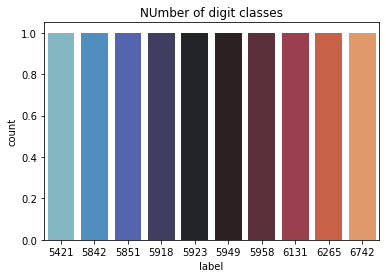

In [16]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"].value_counts(), palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

true label :  0


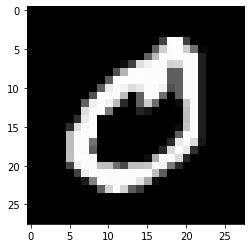

In [17]:
demo_num = train_data.iloc[21, 1:]
demo_num.shape
demo_num = demo_num.values.reshape(28, 28)
print("true label : ", train_data.iloc[21,0])
plt.imshow(demo_num, cmap='gray')

### Preparing Features and Labels

In [27]:
y = train_data['label']
X = train_data.drop(columns = 'label')

y_test = test_data['label']
X_test = test_data.drop(columns = 'label')

### Scaling Pixels

In [28]:
X_scaled = X/255.0
X_test_scaled = X_test/255.0

### Splitting the Data into Train and Validation
(Note : we are already having test data so extracting validation data from train_data)

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.167, shuffle=True ,random_state = 10,stratify=y)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49980 entries, 41368 to 53402
Columns: 784 entries, 1x1 to 28x28
dtypes: float64(784)
memory usage: 299.3 MB


In [58]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 41611 to 12178
Columns: 784 entries, 1x1 to 28x28
dtypes: float64(784)
memory usage: 60.0 MB


In [59]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 49980 entries, 41368 to 53402
Series name: label
Non-Null Count  Dtype
--------------  -----
49980 non-null  int64
dtypes: int64(1)
memory usage: 780.9 KB


In [60]:
y_val.info()

<class 'pandas.core.series.Series'>
Int64Index: 10020 entries, 41611 to 12178
Series name: label
Non-Null Count  Dtype
--------------  -----
10020 non-null  int64
dtypes: int64(1)
memory usage: 156.6 KB


### Trying out an SVM with linear kernel

In [66]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_val)

### Accuracy for Linear Kernel

accuracy: 0.918562874251497 



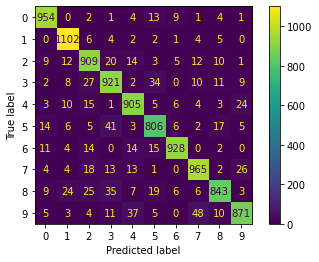

In [67]:
print("accuracy:", metrics.accuracy_score(y_true=y_val, y_pred=y_pred), "\n")
cm = confusion_matrix(y_true=y_val, y_pred=y_pred, labels=model_linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_linear.classes_)
disp.plot()
plt.show()

### Trying out a non linear kernel

In [68]:
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)
y_pred = non_linear_model.predict(X_val)

accuracy: 0.9641716566866267 



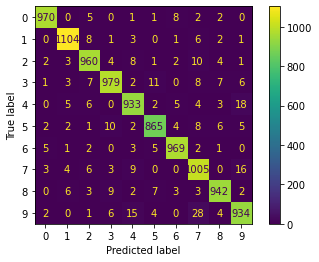

In [69]:
print("accuracy:", metrics.accuracy_score(y_true=y_val, y_pred=y_pred), "\n")
cm = confusion_matrix(y_true=y_val, y_pred=y_pred, labels=non_linear_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=non_linear_model.classes_)
disp.plot()
plt.show()

### Building and Evaluating the final model

Let's now build and evaluate the final model, i.e. the model with highest val accuracy.


In [ ]:
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Testing the final model on test dataset

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

### Saving the model for deployment

In [57]:
import pickle
pickle.dump(model, open('model2.pkl', 'wb'))